In [10]:
import os

folder_path = "/content/drive/MyDrive/ds_Chanchal"
os.makedirs(folder_path, exist_ok=True)

print("Folder created at:", folder_path)


Folder created at: /content/drive/MyDrive/ds_Chanchal


Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [15]:
sentiment = pd.read_csv('/content/drive/MyDrive/ds_Chanchal/csv_files/fear_greed_index.csv')
trades = pd.read_csv('/content/drive/MyDrive/ds_Chanchal/csv_files/historical_data.csv')

sentiment.head(), trades.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

Converting trade timestamps

In [16]:
trades['time'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
trades['date'] = trades['time'].dt.date
print(trades['date'].head())

0    2024-02-12
1    2024-02-12
2    2024-02-12
3    2024-02-12
4    2024-02-12
Name: date, dtype: object


Converting sentiment date

In [17]:
print(sentiment.columns)
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date
sentiment = sentiment[['date','classification']]
print(sentiment.head())

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
         date classification
0  2018-02-01           Fear
1  2018-02-02   Extreme Fear
2  2018-02-03           Fear
3  2018-02-04   Extreme Fear
4  2018-02-05   Extreme Fear


Converting PnL numeric

In [18]:
trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce').fillna(0)
trades['Closed PnL'].head()

,Closed PnL
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Merging sentiment and trades

In [19]:
df = trades.merge(sentiment, on='date', how='left')
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed


Filling missing Classification (forward/backward)

In [20]:
df['classification'] = df['classification'].fillna(method='ffill').fillna(method='bfill')
df.head()

/tmp/ipython-input-1639558761.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['classification'] = df['classification'].fillna(method='ffill').fillna(method='bfill')


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12 22:50:00,2024-02-12,Greed


Adding profit flag

In [21]:
df['is_profit'] = df['Closed PnL'] > 0
df['is_profit']

,is_profit
0,False
1,False
2,False
3,False
4,False
...,...
211219,False
211220,False
211221,False
211222,False


Basic summary

In [22]:
print("Total Trades:", len(df))
print("Unique Traders:", df['Account'].nunique())
print(df.head())

Total Trades: 211224
Unique Traders: 32
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash

Analysis by sentiment

In [23]:
sent_summary = df.groupby("classification").agg(
    avg_pnl = ("Closed PnL", "mean"),
    total_pnl = ("Closed PnL", "sum"),
    win_rate = ("is_profit", "mean"),
    trades = ("is_profit", "count")
).reset_index()

print("\n--- Sentiment Summary ---")
print(sent_summary)


--- Sentiment Summary ---
  classification    avg_pnl     total_pnl  win_rate  trades
0   Extreme Fear  35.493854  6.101749e+05  0.383282   17191
1  Extreme Greed  95.377129  2.950110e+06  0.468915   30931
2           Fear  46.030630  4.138568e+06  0.392130   89909
3          Greed  39.997999  2.303125e+06  0.420781   57581
4        Neutral  18.894528  2.949814e+05  0.402959   15612


Win rate plot

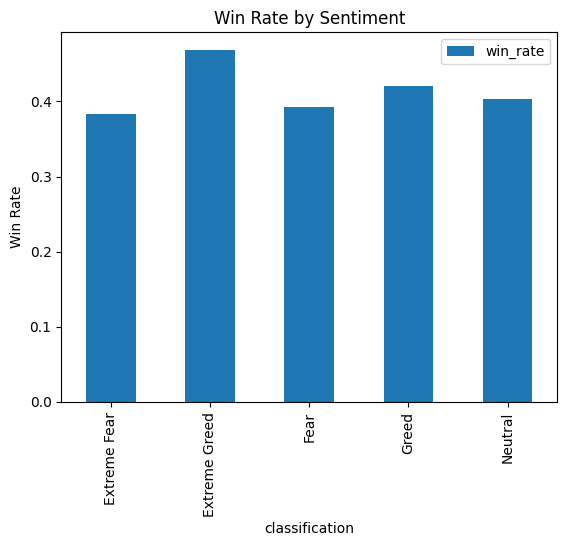

In [24]:
sent_summary.plot(x="classification", y="win_rate", kind="bar", title="Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()

PnL distribution

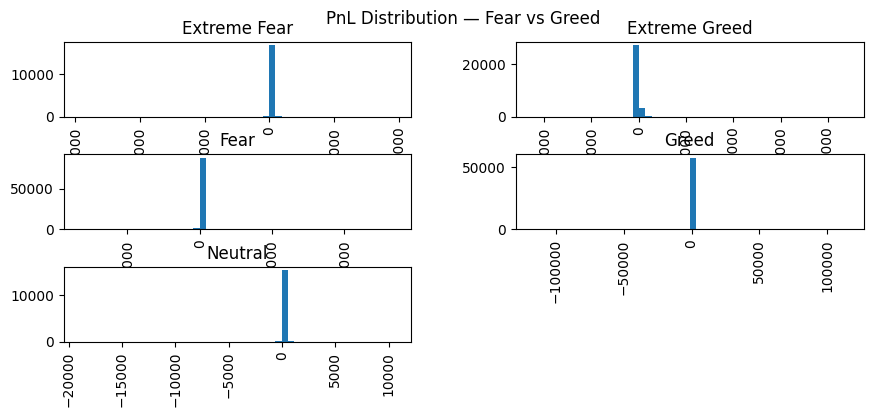

In [25]:
df.hist(column="Closed PnL", by="classification", bins=50, figsize=(10,4))
plt.suptitle("PnL Distribution — Fear vs Greed")
plt.show()

Quick Insights (auto-generated)

In [26]:
insights = []

fear = sent_summary[sent_summary["classification"].str.contains("Fear", case=False)]
greed = sent_summary[sent_summary["classification"].str.contains("Greed", case=False)]

if not fear.empty and not greed.empty:
    if fear['avg_pnl'].values[0] < greed['avg_pnl'].values[0]:
        insights.append("Trades during GREED have higher average PnL.")
    else:
        insights.append("Trades during FEAR have higher average PnL.")

    if fear['win_rate'].values[0] < greed['win_rate'].values[0]:
        insights.append("Win rate is higher during GREED market conditions.")
    else:
        insights.append("Win rate is higher during FEAR market conditions.")

print("\n--- Insights ---")
for i in insights:
    print("•", i)


--- Insights ---
• Trades during GREED have higher average PnL.
• Win rate is higher during GREED market conditions.
